<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 14

# Today's Topics

1. K-Means Clustering
2. Self-Organizing Maps (SOMs)

There are two concepts that form the basic building block of SOMs: Clustering data, Competitive Learning.

# K-Means Clustering

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

An important property of clusters is that the points within a cluster should be similar to each other. The primary aim here is to minimize the distance between the points within a cluster.

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

The Algorithm:

Step 1: Choose the number of clusters k

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4

### Stopping Criteria for K-Means Clustering

There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

1. Centroids of newly formed clusters do not change

2. Points remain in the same cluster

3. Maximum number of iterations are reached

# Competitive learning

Until now, for all Neural networks we have been updating weights to correct for errors. Under competitive learning paradigm, the goal is not to map inputs to outputs (to correct errors). Rather the neurons compete for the right to respond to a subset of similar input data and push their weights closer to one of the input points. Learning process is also different from Backpropagation in Neural Networks.

General Idea:

Activation of a neuron increases with greater similarity between the weight vector of the neuron and the input. It is assumed the the weight vector has the same dimensionality as the input. A common approach is to use the Euclidian distance between the input and the weight vector in order to compute the activation. Smaller distances lead to larger activation. The output unit that has the highest activation to a given input is declared the winner and moved closer to the input.

In the winner-take-all strategy, only the winning neuron(with the highest activation) is updated and the remaining neurons remain unchanged. There are other variants of the competitive learning paradigm that allow other neurons to participate in the update based on pre-defined neighborhood relationships.

Steps:

1. The euclidean distance is computed for each $i$. if $p$-th neuron has the smallest value of Euclidean distance then that is declared the winner.

2. The $p$-th neuron is updated using the update rule.

The weight vectors are viewed as prototypes(similar to centroids in k-means) and then move the winning(prototype) a small distance towards the training instance.

## Vector Quantization

Vector quatization is an application of comptetitive learning. The notion of sensitivity is introduced where $s_i$ is greater than or equal to zero. The senitivity value helps in balancing points among different clusters. This value is initialized to zero for all nodes. In each iteration, it is increased by $\gamma >0$ for non-winners and set to zero for the winner. To choose the winner, the smallest value of $||W_i -\bar{X}||-s_i$ is used. This approach makes the clusters more balanced even if regions have varying density. This is used in applications like dimensionality reduction and data compression.

# SOMs

A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher dimensional data set while preserving the topological structure of the data.

Like most artificial neural networks, operate in two modes: training and mapping. First, training uses an input data set (the "input space") to generate a lower-dimensional representation of the input data (the "map space"). Second, mapping classifies additional input data using the generated map.

[Source](https://en.wikipedia.org/wiki/Self-organizing_map)

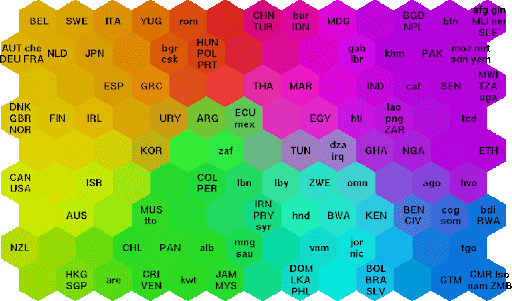

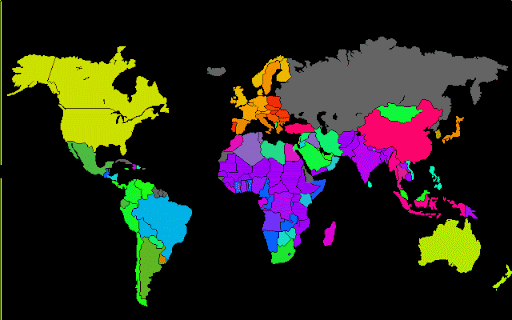

# Readings

[Paper 1](http://cis.legacy.ics.tkk.fi/research/reports/biennial02-03/cis-biennial-report-2002-2003-8.pdf)

[Paper 2](https://www.sciencedirect.com/science/article/pii/S0925231298000307?casa_token=wcdw1Lj3RxUAAAAA:F9VOHeY1JDvNHBYI_d1k306K-OnVVMe0wMm3ekJblXWpW3sCATR4fn8wWRLgFDt_GRLrseQI27Y)

[Article](https://www.visualcinnamon.com/2013/07/self-organizing-maps-creating-hexagonal/)

[Picture source](http://www.cis.hut.fi/research/som-research/worldmap.html)

# Implementing SOMs for Fraud detection (Optional)

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=1e2c47fd69227211960f838f91b1a86e673d741b0cbf1d68a9d639813f80e737
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


[Dataset](http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

In [3]:
"""### Importing the libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""## Importing the dataset"""

dataset = pd.read_csv('CreditFraud.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

"""## Feature Scaling"""

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

"""##Training the SOM"""

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

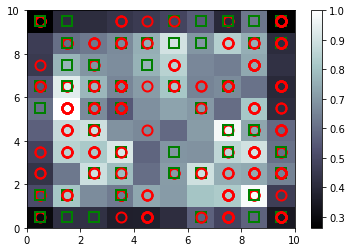

In [4]:
"""##Visualizing the results"""

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [5]:
"""## Finding the frauds"""

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

"""##Printing the Fraunch Clients"""

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15571415
15699340
15644400
15684440
15778589
15767264
15573798
15647295
